In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mlxtend.plotting import scatterplotmatrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import pylab
from scipy.stats import uniform, randint

In [ ]:
df=pd.read_csv('/content/Advertising.csv')

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.info()
print("The shape is ",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
The shape is  (200, 5)


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
df.iloc[df['Sales'].idxmax()]

,175
Unnamed: 0,176.0
TV,276.9
Radio,48.9
Newspaper,41.8
Sales,27.0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
df.iloc[df['Sales'].idxmin()]

,130
Unnamed: 0,131.0
TV,0.7
Radio,39.6
Newspaper,8.7
Sales,1.6


In [ ]:
df['Total']=df['TV']+df['Radio']+df['Newspaper']
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.iloc[df['Total'].idxmax()]

,101
TV,296.4
Radio,36.3
Newspaper,100.9
Sales,23.8
Total,433.6


In [ ]:
np.std(df['Total'])#populaion based

92.75242632810206

In [ ]:
print(stats.pearsonr(df['TV'],df['Sales']))
print(stats.pearsonr(df['Radio'],df['Sales']))
print(stats.pearsonr(df['Newspaper'],df['Sales']))

PearsonRResult(statistic=0.7822244248616065, pvalue=1.467389700194595e-42)
PearsonRResult(statistic=0.576222574571055, pvalue=4.354966001767087e-19)
PearsonRResult(statistic=0.2282990263761654, pvalue=0.0011481958688882026)


<Axes: >

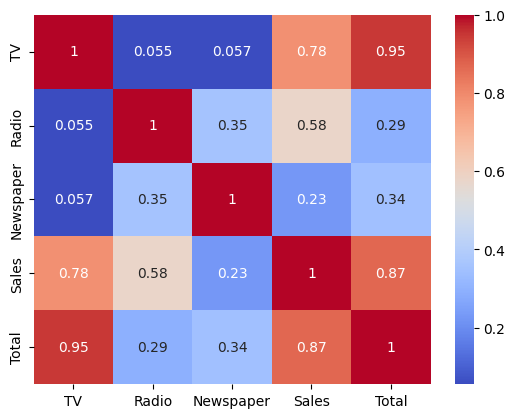

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<Axes: >

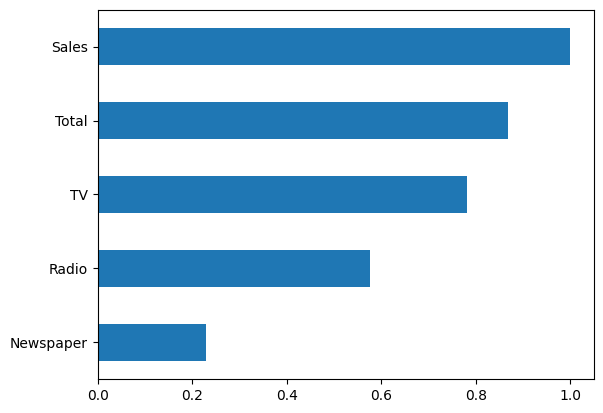

In [ ]:
df.corr()['Sales'].sort_values(ascending=True).plot(kind='barh')

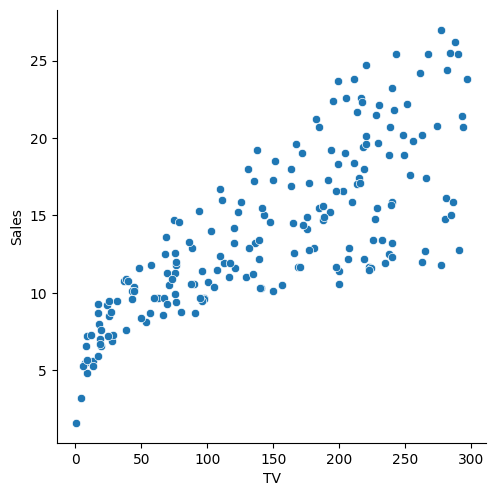

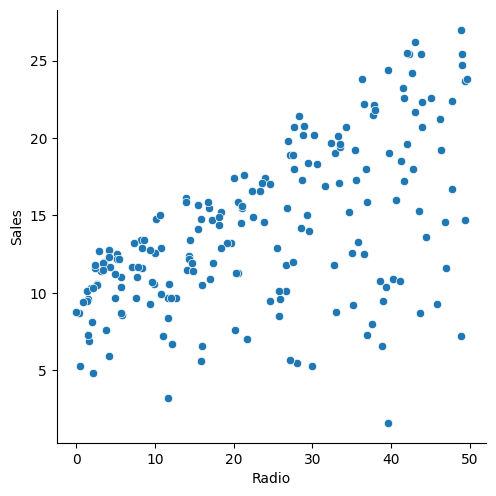

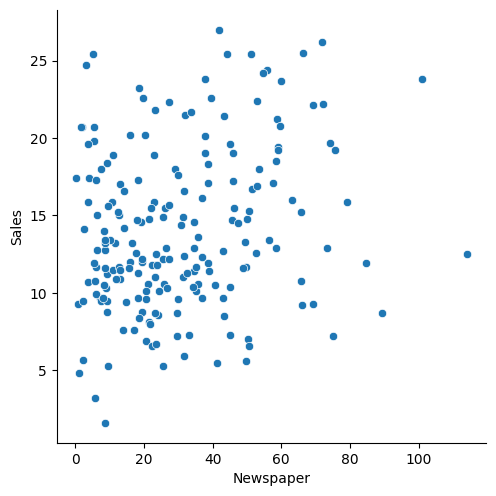

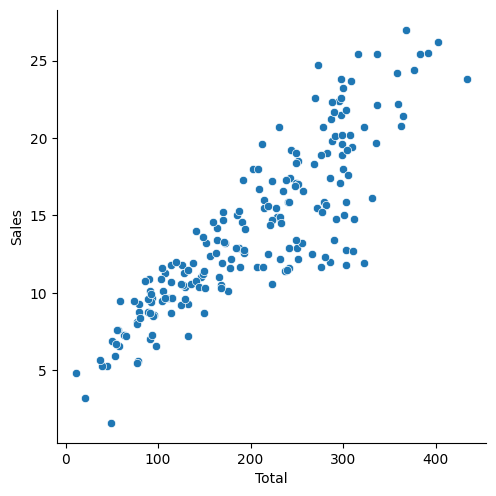

In [ ]:
for i in enumerate(df.drop('Sales',axis=1)):
  sns.pairplot(
      df,
      x_vars=i[1],
      y_vars='Sales',
      kind='scatter',
      height=5
  )

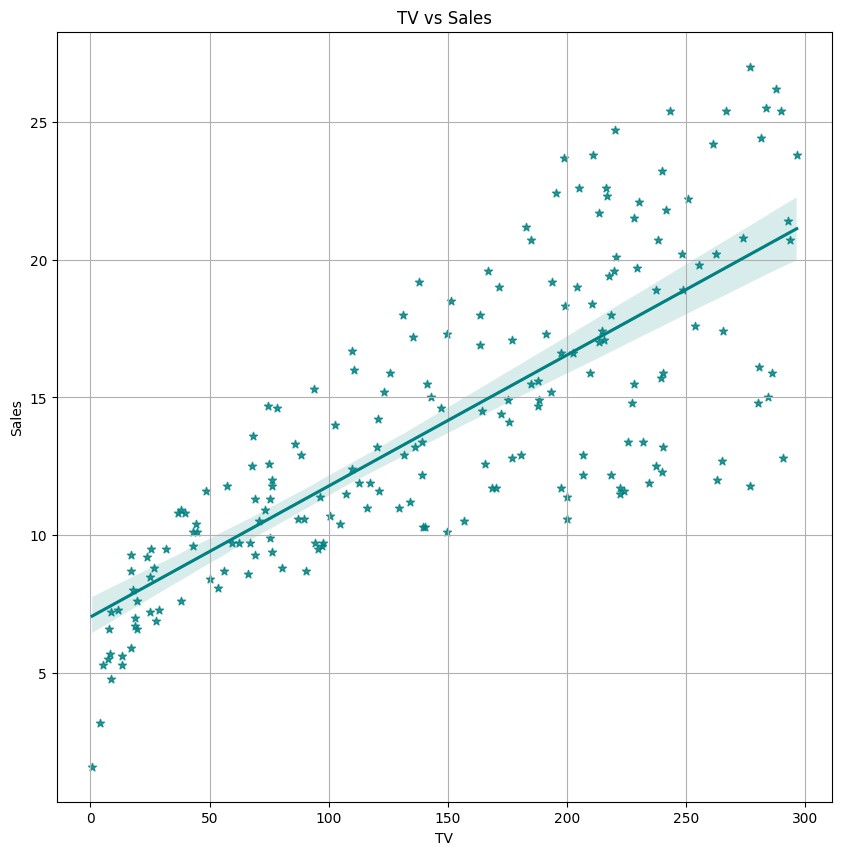

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703, intercept_stderr=0.4578429402734785)


In [ ]:
plt.figure(figsize=(10,10))
plt.grid('On')
sns.regplot(x=df['TV'],y=df['Sales'],color='teal',marker='*')
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()
print(stats.linregress(df['TV'],df['Sales']))#y=mx+c

LinregressResult(slope=0.20249578339243954, intercept=9.311638095158287, rvalue=0.576222574571055, pvalue=4.354966001766976e-19, stderr=0.02041130636009063, intercept_stderr=0.562900496271871)


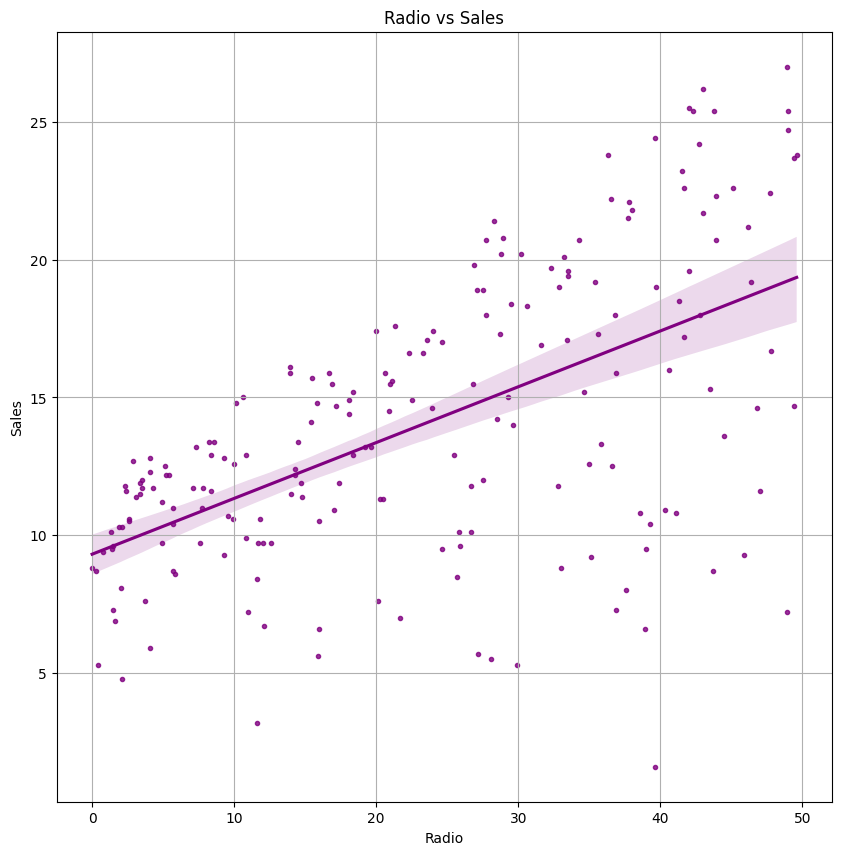

In [ ]:
plt.figure(figsize=(10,10))
plt.grid('On')
sns.regplot(x=df['Radio'],y=df['Sales'],color='purple',marker='.')
plt.title('Radio vs Sales')
plt.xlabel('Radio')
print(stats.linregress(df['Radio'],df['Sales']))

LinregressResult(slope=0.05469309847227331, intercept=12.351407069278162, rvalue=0.22829902637616528, pvalue=0.0011481958688882112, stderr=0.016575721876358154, intercept_stderr=0.6214201876094342)


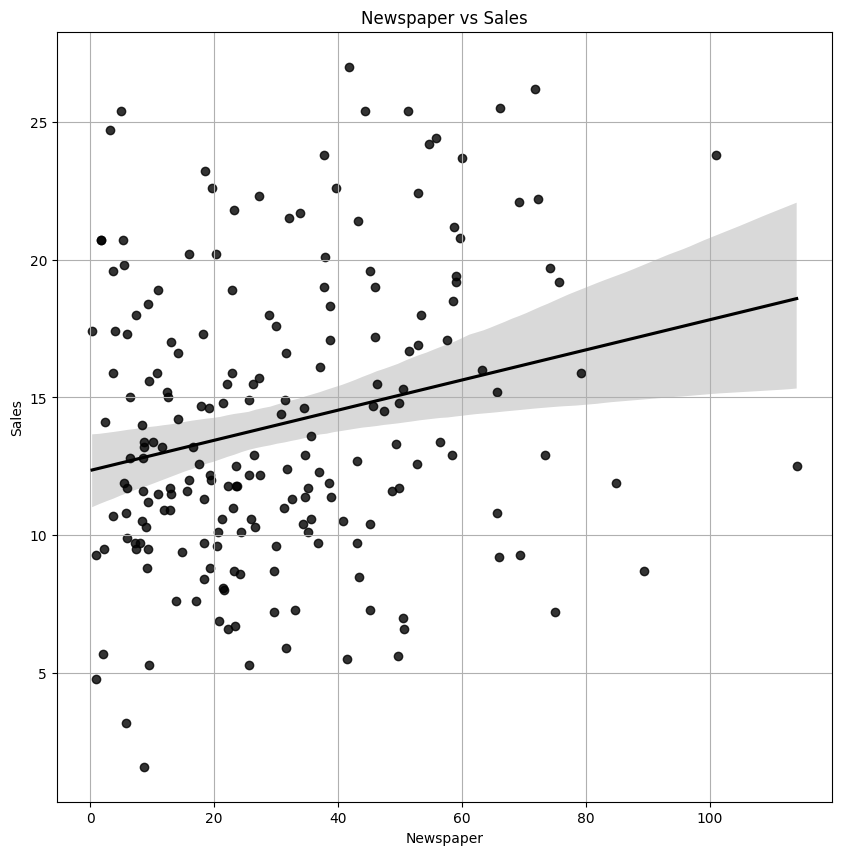

In [ ]:
plt.figure(figsize=(10,10))
plt.grid('On')
sns.regplot(x=df['Newspaper'],y=df['Sales'],color='black',marker='o')
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
print(stats.linregress(df['Newspaper'],df['Sales']))

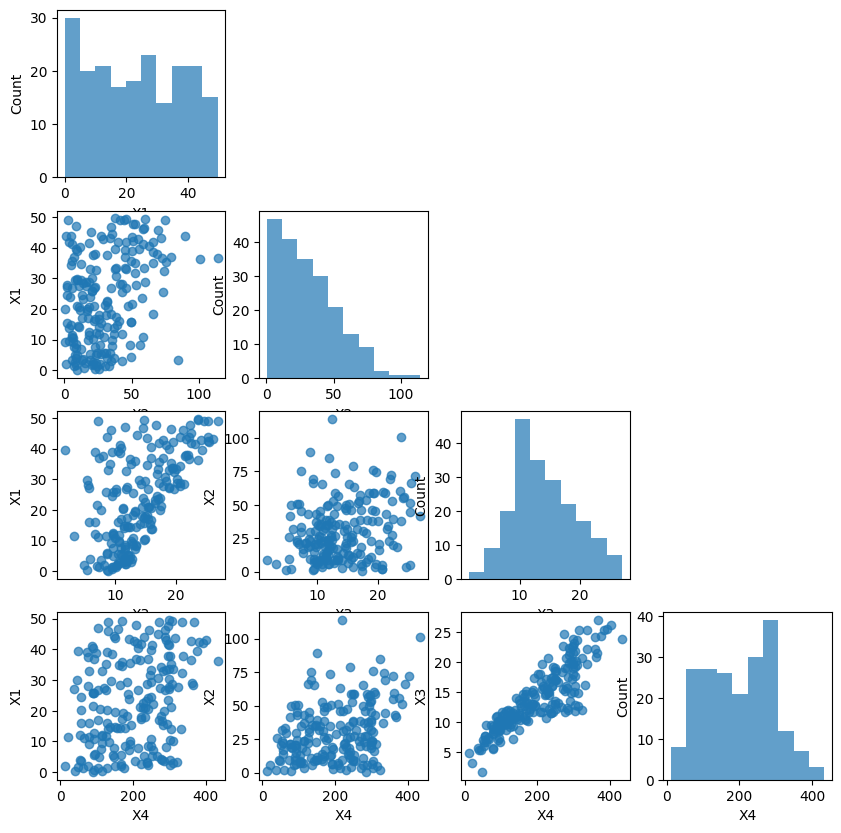

In [ ]:
scatterplotmatrix(df.to_numpy()[:,1:],figsize=(10,10),alpha=0.7)

axes = plt.gcf().axes

axes = np.array(axes).reshape(int(np.sqrt(len(axes))), -1)

plt.show()

<ipython-input-252-a6c3e177d502>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[['Sales']],color='teal',kde=True)


<Axes: ylabel='Density'>

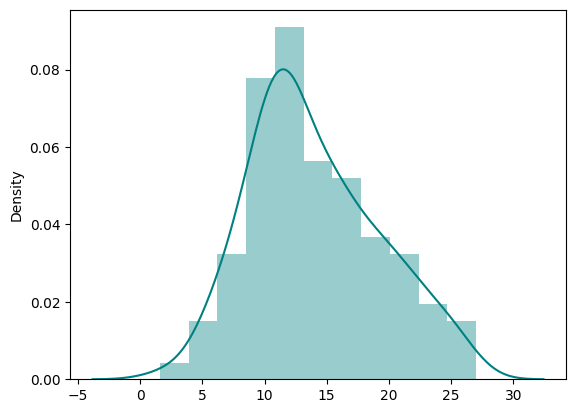

In [ ]:
sns.distplot(x=df[['Sales']],color='teal',kde=True)

<ipython-input-253-f151a6a396f7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[['TV']],color='purple',kde=True)


<Axes: ylabel='Density'>

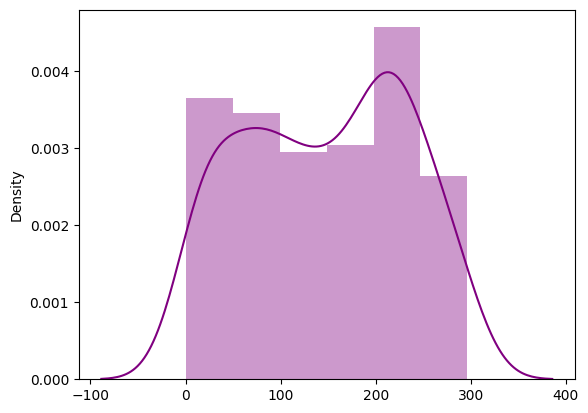

In [ ]:
sns.distplot(x=df[['TV']],color='purple',kde=True)

<ipython-input-254-a7a9a7c6423c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[['Radio']],color='black',kde=True)


<Axes: ylabel='Density'>

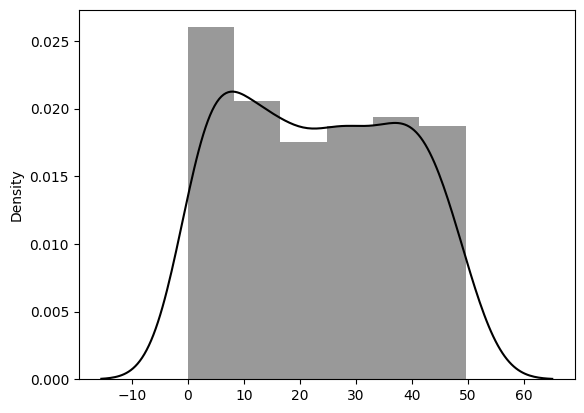

In [ ]:
sns.distplot(x=df[['Radio']],color='black',kde=True)

<ipython-input-255-315889a5c4d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[['Newspaper']],color='blue',kde=True)


<Axes: ylabel='Density'>

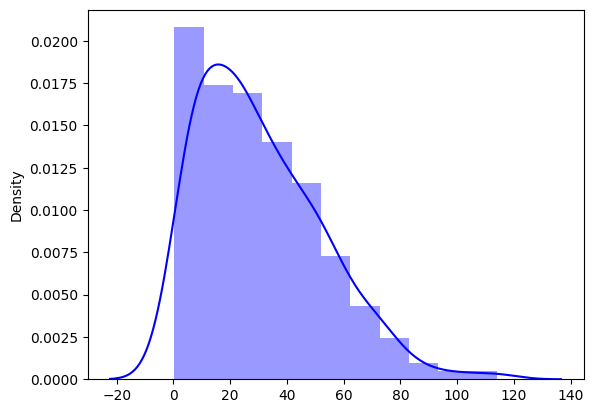

In [ ]:
sns.distplot(x=df[['Newspaper']],color='blue',kde=True)

<ipython-input-256-8de803bb45c1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[['Total']],color='red',kde=True)


<Axes: ylabel='Density'>

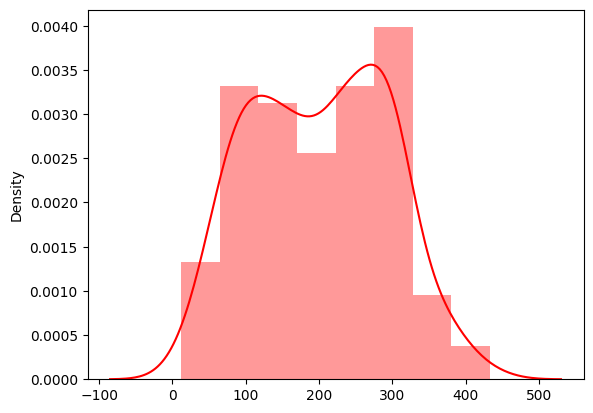

In [ ]:
sns.distplot(x=df[['Total']],color='red',kde=True)

In [ ]:
df=df.drop('Total',axis=1)

x=df.drop('Sales',axis=1)
y=df['Sales']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
le=LinearRegression()
le.fit(x_train,y_train)
y_pred_le=le.predict(x_test)
residuals_le=y_test-y_pred_le
print(residuals_le)

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: Sales, dtype: float64


In [ ]:
le.score(x_test,y_test)
rmse=np.sqrt(mean_squared_error(y_test,le.predict(x_test)))
print(rmse)

1.5161519375993884


In [ ]:
scores_le=cross_val_score(le,x,y,cv=10,scoring='r2')
print(scores_le.mean())

0.8853562237979616


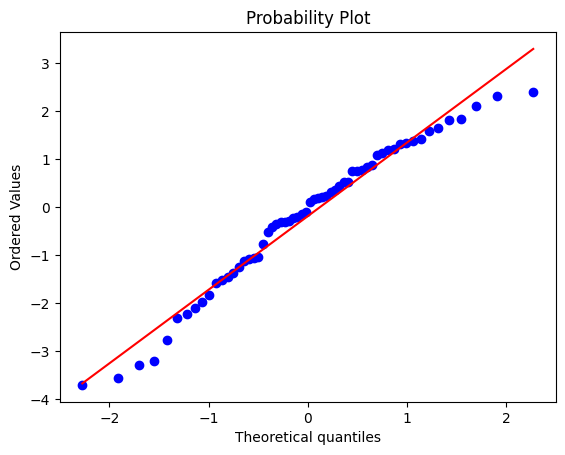

In [ ]:
stats.probplot(residuals_le,dist='norm',plot=pylab)
pylab.show()

In [ ]:
#hpt
parameters={
    'fit_intercept':[True,False],
    'positive':[True,False],
}


In [ ]:
rs=RandomizedSearchCV(le,parameters,n_iter=10,cv=10,random_state=42)

In [ ]:
rs.fit(x_train,y_train)


RandomizedSearchCV(cv=10, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False],
                                        'positive': [True, False]},
                   random_state=42)

In [ ]:
rs.cv_results_

{'mean_fit_time': array([0.00536048, 0.00247123, 0.00233235, 0.00202498]),
 'std_fit_time': array([0.00859892, 0.00025709, 0.00014819, 0.00013845]),
 'mean_score_time': array([0.00193241, 0.00174007, 0.00166621, 0.00178502]),
 'std_score_time': array([4.85979257e-04, 9.70304567e-05, 5.69831577e-05, 4.08617109e-04]),
 'param_positive': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value=True),
 'param_fit_intercept': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value=True),
 'params': [{'positive': True, 'fit_intercept': True},
  {'positive': False, 'fit_intercept': True},
  {'positive': True, 'fit_intercept': False},
  {'positive': False, 'fit_intercept': False}],
 'split0_test_score': array([0.87829386, 0.87829386, 0.77516665, 0.77516665]),
 'split1_test_score': array([0.91589051, 0.91589051, 0.89220657, 0.89220657]),
 'split2_test_score': array([0.88728973, 0.8

In [ ]:
rs.best_params_

{'positive': True, 'fit_intercept': True}

In [ ]:
xgb=XGBRegressor(n_estimators=100,learning_rate=0.1)
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
residuals_xgb=y_test-y_pred_xgb
print(residuals_xgb)

37     0.959433
109    1.780965
31    -1.103786
89    -0.523291
66     0.944888
119   -0.896923
54    -0.082967
74    -0.177656
145   -0.162811
142    0.312547
148    0.292675
112   -0.272929
174   -0.272921
55     1.757835
141   -0.406451
149    0.232207
25    -0.424340
34     0.760810
170   -0.473882
39    -0.525026
172    0.049244
153   -0.914120
175    1.307043
61    -0.489672
65    -0.723767
50    -0.356688
42     0.274734
129   -0.719107
179   -1.564832
2      1.306179
12     0.854503
133   -0.194113
90     0.187567
22    -1.253364
41    -1.550463
32     0.748890
125    0.743774
196    0.413200
158    0.337838
180   -0.841940
16     0.011558
186   -0.179157
144    0.310257
121   -0.688550
80    -0.008237
18    -0.083489
78     3.621381
48    -0.875203
4     -1.793717
15     0.501391
1     -1.245305
43    -0.095004
102   -0.234461
164   -0.755279
9     -0.986576
155    1.521381
36     0.903036
190    0.207953
33     1.373591
45    -0.235605
Name: Sales, dtype: float64


In [ ]:
xgb_rmse=np.sqrt(mean_squared_error(y_test,xgb.predict(x_test)))
print(xgb_rmse)

0.9447272420100774


In [ ]:
xgb_scores=cross_val_score(xgb,x,y,cv=10,scoring='r2')
print(xgb_scores.mean())

0.9783669329833741


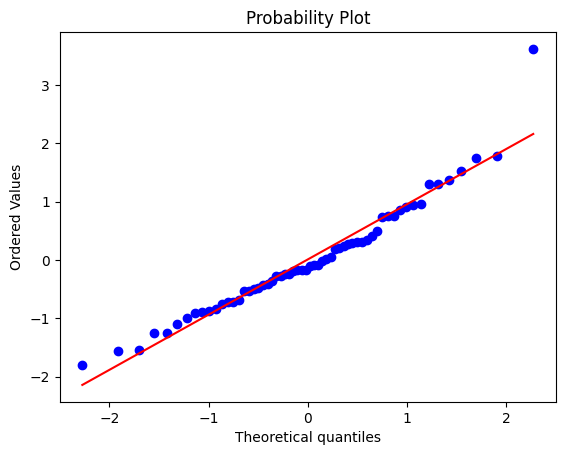

In [ ]:
stats.probplot(residuals_xgb,dist='norm',plot=pylab)
pylab.show()

In [ ]:
param_dist_xgb = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
}

In [ ]:
rs_xgb=RandomizedSearchCV(xgb,param_dist_xgb,n_iter=10,cv=10,random_state=42)

In [ ]:
rs_xgb.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c0e4e3b1210>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c0e320655a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c0e32065f90>},
                   random_state=42)

In [ ]:
rs_xgb.best_params_

{'learning_rate': 0.02692347370813008, 'max_depth': 6, 'n_estimators': 463}

In [ ]:
rs.cv_results_

{'mean_fit_time': array([0.00536048, 0.00247123, 0.00233235, 0.00202498]),
 'std_fit_time': array([0.00859892, 0.00025709, 0.00014819, 0.00013845]),
 'mean_score_time': array([0.00193241, 0.00174007, 0.00166621, 0.00178502]),
 'std_score_time': array([4.85979257e-04, 9.70304567e-05, 5.69831577e-05, 4.08617109e-04]),
 'param_positive': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value=True),
 'param_fit_intercept': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value=True),
 'params': [{'positive': True, 'fit_intercept': True},
  {'positive': False, 'fit_intercept': True},
  {'positive': True, 'fit_intercept': False},
  {'positive': False, 'fit_intercept': False}],
 'split0_test_score': array([0.87829386, 0.87829386, 0.77516665, 0.77516665]),
 'split1_test_score': array([0.91589051, 0.91589051, 0.89220657, 0.89220657]),
 'split2_test_score': array([0.88728973, 0.8

In [ ]:
rf=RandomForestRegressor(n_estimators=100,max_depth=10)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
residuals_rf=y_test-y_pred_rf
print(residuals_rf)

37     1.358000
109    1.846000
31    -0.520000
89     1.749000
66     1.600000
119   -0.276000
54     0.121333
74    -0.211000
145   -0.835000
142    0.771667
148    0.327000
112   -0.470000
174   -0.312333
55     1.621000
141    0.297000
149    0.188000
25    -0.496167
34     0.176000
170   -1.104000
39    -0.510700
172   -0.014000
153    0.031000
175    1.671000
61     0.242967
65    -0.823500
50    -0.455400
42     0.518000
129   -0.079000
179   -1.165000
2      1.317000
12     0.875000
133    0.250667
90    -0.312000
22    -0.721000
41    -1.040333
32     0.170000
125    0.396000
196    0.133000
158    0.650000
180   -0.796000
16    -0.434000
186   -0.910000
144    0.312500
121   -0.601000
80     0.284500
18     0.378500
78    -0.638000
48    -0.843000
4     -1.047000
15     0.539000
1     -0.824000
43     0.080000
102    0.333000
164   -0.403000
9     -1.253733
155   -1.327000
36     0.777000
190    0.472000
33     1.251000
45    -0.623000
Name: Sales, dtype: float64


In [ ]:
rf_rmse=np.sqrt(mean_squared_error(y_test,rf.predict(x_test)))
print(rf_rmse)

0.8131164188774842


In [ ]:
rf_scores=cross_val_score(rf,x,y,cv=10,scoring='r2')
print(rf_scores.mean())

0.9797966786772644


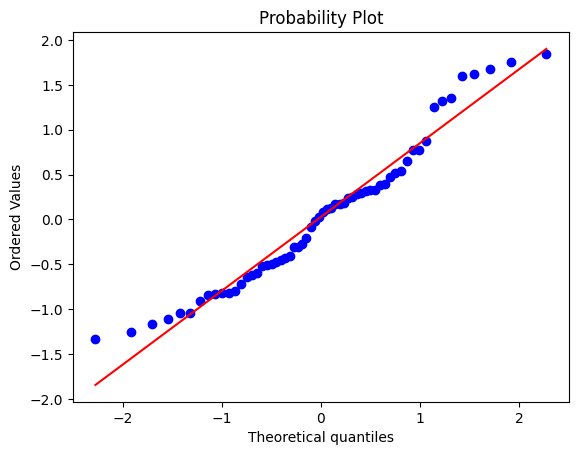

In [ ]:
stats.probplot(residuals_rf,dist='norm',plot=pylab)
pylab.show()

In [ ]:
rf_parameters={
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'bootstrap': [True, False]
}


In [ ]:
rf_rs=RandomizedSearchCV(rf,rf_parameters,n_iter=10,cv=10,random_state=42)

In [ ]:
rf_rs.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(max_depth=10),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c0e3203a050>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c0e32039ae0>},
                   random_state=42)

In [ ]:
rf_rs.best_params_

{'bootstrap': True, 'max_depth': 33, 'n_estimators': 472}